# ML Course 3 - Practice (solution)

## Subject

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE (L)** e.g. 2.0
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [2]:
data = pd.read_csv("FuelConsumption.csv")

In [3]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
642,2014,LAND ROVER,RANGE ROVER LWB V8 5.0 SC FFV,SUV - STANDARD,5.0,8,AS8,E,25.0,16.9,21.4,13,342
636,2014,LAND ROVER,LR2,SUV - SMALL,2.0,4,AS6,Z,13.5,9.9,11.9,24,274
308,2014,DODGE,CHARGER AWD FFV,FULL-SIZE,3.6,6,A8,E,17.3,11.7,14.8,19,237
954,2014,SUBARU,IMPREZA WAGON AWD,STATION WAGON - SMALL,2.5,4,M6,Z,14.2,10.4,12.5,23,288
241,2014,CHEVROLET,SILVERADO,PICKUP TRUCK - STANDARD,6.2,8,A6,Z,16.3,11.4,14.1,20,324
498,2014,HONDA,ODYSSEY,MINIVAN,3.5,6,A6,X,12.3,8.5,10.6,27,244


* Compute the correlation value between the CO2 emission and the engine size. Do you think that the engine size can be taken as a unique predictor for the CO2 emission? 
* Plot the CO2 emission with respect to the engine size. Do you think that a linear regression model would fit well here?
* Train a linear regression model for the prediction of the CO2 emission based exclusively on the engine size (do not forget the train-test split).
* What are the parameters of the regression line? If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model? 
* Plot the fit line over the data.
* Plot the distribution of the residuals (i.e. the error terms).
* Compute the model accuracy.
* Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and compute the accuracy. Compare with the accuracy computed at previous point. What can you deduce?

## Suggestion of solution

* Compute the correlation value between the CO2 emission and the engine size. Do you think that the engine size can be taken as a unique predictor for the CO2 emission? 

In [4]:
correlation = data[['ENGINESIZE','CO2EMISSIONS']].corr()
# Alternative: data['ENGINESIZE'].corr(data['CO2EMISSIONS'])
print('Correlation between CO2 emission and engine size is ' + str(correlation['CO2EMISSIONS']['ENGINESIZE']))

Correlation between CO2 emission and engine size is 0.8741543683958124


ENGINESIZE is well correlated with CO2EMISSIONS (correlation of 0.87 is rather close to 1) so it can be taken as a unique predictor for the CO2 emission.

* Plot the CO2 emission with respect to the engine size. Do you think that a linear regression model would fit well here?

In [5]:
X = data['ENGINESIZE'].values.reshape(-1,1)
y = data['CO2EMISSIONS'].values.reshape(-1,1)

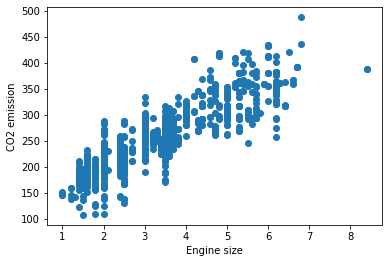

In [6]:
plt.scatter(X, y)
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.show()

The scatter plot looks linear so probably the regression model will fit well.

* Train a linear regression model for the prediction of the CO2 emission based exclusively on the engine size (do not forget the train-test split).

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

* What are the parameters of the regression line? If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model? 

In [9]:
print('Coefficients: ', regr.coef_[0][0])
print('Intercept: ', regr.intercept_[0])

Coefficients:  39.85725417403619
Intercept:  125.07790674626341


If the engine size is increased by 1 L, according to our model, the CO2 emission will increase by around 39.9 g/km.

* Plot the fit line over the data.

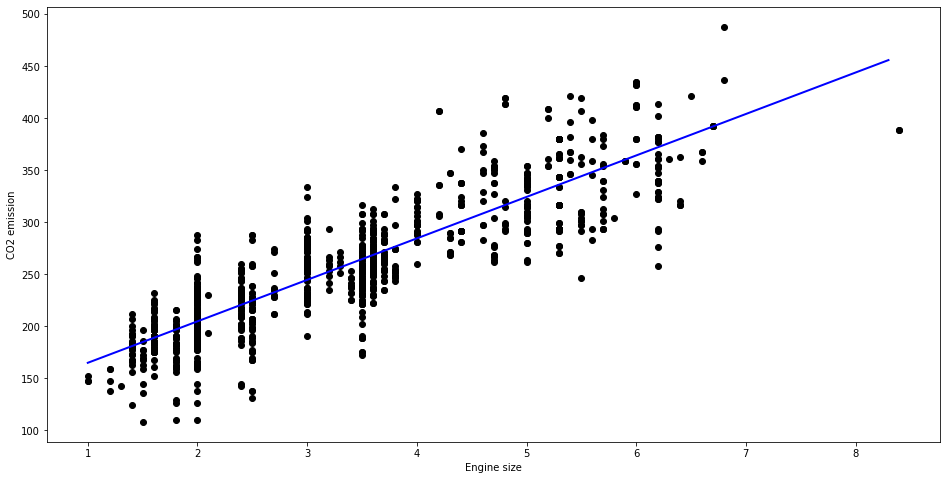

In [10]:
X_plot = np.arange(min(X), max(X), 0.1)
y_plot = regr.predict(X_plot.reshape(-1, 1))

plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.plot(X_plot, y_plot, c='blue', linewidth=2)
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.show()

* Plot the distribution of the residuals (i.e. the error terms).

In [11]:
y_pred = regr.predict(X_test)

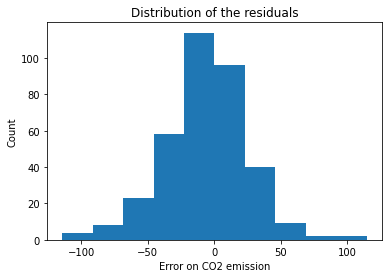

In [12]:
residuals =  y_test - y_pred
plt.hist(x=residuals)
plt.xlabel('Error on CO2 emission')
plt.ylabel('Count')
plt.title("Distribution of the residuals")
plt.show()

* Compute the model accuracy.

In [13]:
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 373781.28
Mean absolute error (MAE): 24.86
Mean square error (MSE): 1049.95
Root mean square error (RMSE): 32.40


* Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and compute the accuracy. Compare with the accuracy computed at previous point. What can you deduce?

In [84]:
X = data['FUELCONSUMPTION_COMB'].values.reshape(-1,1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [86]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [88]:
y_pred = regr.predict(X_test)

print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 309995.19
Mean absolute error (MAE): 20.34
Mean square error (MSE): 870.77
Root mean square error (RMSE): 29.51


The RMSE is lower here (29.51 here vs. 32.40 before) so it seems that combined fuel consumption is a slightly better predictor than engine size for CO2 consumption prediction.